<a href="https://colab.research.google.com/github/NikiP31/CudaResearchProject/blob/main/Cuda_findings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvcc -o avg avg.cu


In [2]:
!nvcc -o stdev stdev.cu


In [3]:
!nvcc -o avg_serial avg_serial.cu

avg_serial.cu(8): warning #550-D: variable "average" was set but never used
      double average;
             ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"



In [4]:
!nvcc -o stdev_serial stdev_serial.cu

stdev_serial.cu(10): warning #550-D: variable "stdev" was set but never used
      double mean, stdev;
                   ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"



In [10]:
import subprocess
import pandas as pd

inputs = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 10000000,50000000,100000000]

results = []

def run_cuda_binary(binary, input_value):
    try:
        process = subprocess.run(
            [f"./{binary}", str(input_value)],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        if process.returncode != 0:
            print(f"Error running {binary} with input {input_value}: {process.stderr}")
            return None

        output = process.stdout.strip()

        return float(output)
    except Exception as e:
        print(f"Error: {e}")
        return None

for N in inputs:
    stdev_time = run_cuda_binary("stdev", N)
    stdev_serial_time = run_cuda_binary("stdev_serial", N)
    avg_time = run_cuda_binary("avg", N)
    avg_serial_time = run_cuda_binary("avg_serial", N)

    results.append({
        "N": N,
        "stdev_time": stdev_time,
        "stdev_serial_time": stdev_serial_time,
        "avg_time": avg_time,
        "avg_serial_time": avg_serial_time
    })

df = pd.DataFrame(results)

print(df)

df.to_csv("cuda_execution_times.csv", index=False)


            N  stdev_time  stdev_serial_time  avg_time  avg_serial_time
0          10       2.139               0.00     1.118             0.00
1          50       2.141               0.00     1.172             0.00
2         100       2.070               0.00     1.096             0.00
3         500       2.116               0.00     1.202             0.00
4        1000       2.125               0.00     1.118             0.00
5        5000       2.099               0.02     1.102             0.01
6       10000       2.476               0.03     1.450             0.03
7       50000       2.552               0.16     1.427             0.14
8      100000       2.605               0.30     1.492             0.27
9      500000       2.622               1.48     1.430             1.34
10   10000000       2.934              28.63     1.482            26.69
11   50000000       4.272             138.62     2.311           133.81
12  100000000       6.012             279.49     3.086          

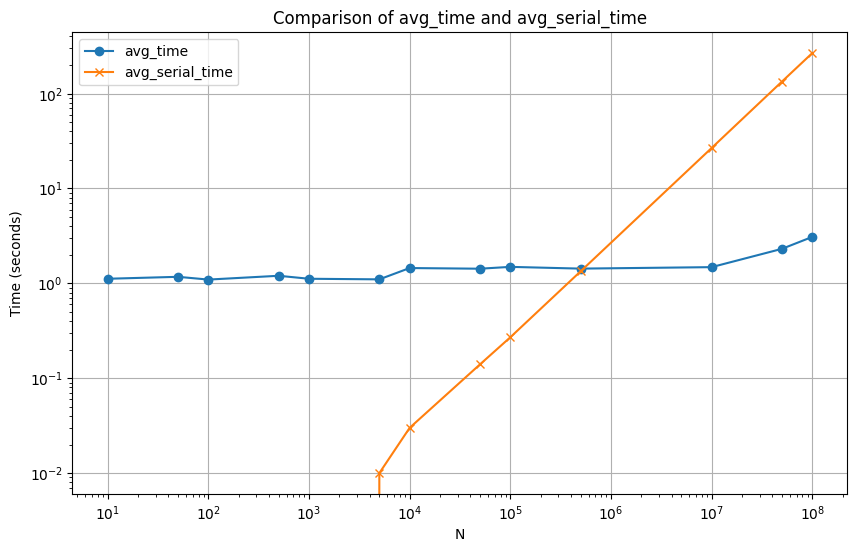

In [11]:

import matplotlib.pyplot as plt


# Plot 1: Comparison of avg_time with avg_serial_time
plt.figure(figsize=(10, 6))
plt.plot(df['N'], df['avg_time'], label='avg_time', marker='o')
plt.plot(df['N'], df['avg_serial_time'], label='avg_serial_time', marker='x')
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('Comparison of avg_time and avg_serial_time')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()




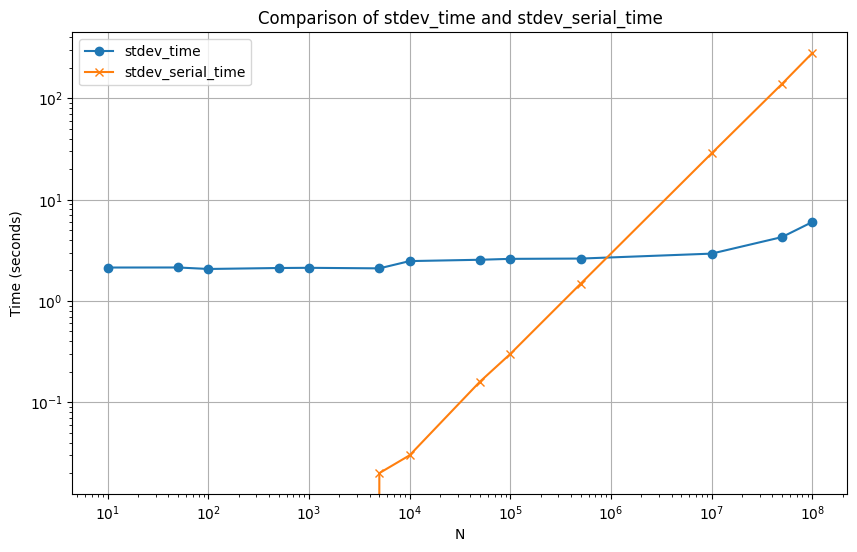

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['N'], df['stdev_time'], label='stdev_time', marker='o')
plt.plot(df['N'], df['stdev_serial_time'], label='stdev_serial_time', marker='x')
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('Comparison of stdev_time and stdev_serial_time')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

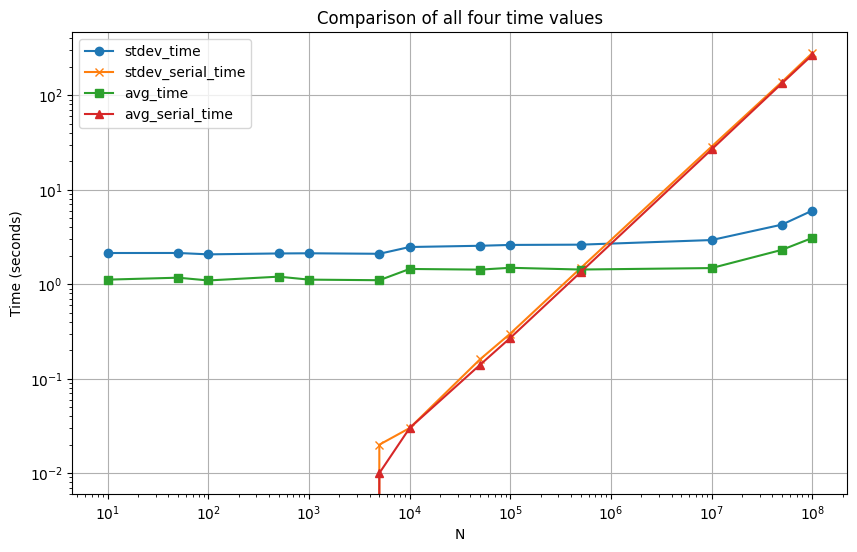

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df['N'], df['stdev_time'], label='stdev_time', marker='o')
plt.plot(df['N'], df['stdev_serial_time'], label='stdev_serial_time', marker='x')
plt.plot(df['N'], df['avg_time'], label='avg_time', marker='s')
plt.plot(df['N'], df['avg_serial_time'], label='avg_serial_time', marker='^')
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('Comparison of all four time values')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()